## Multi-Language Bible Corpus Analyses

In [1]:
!git clone https://github.com/Tiagoblima/bible-corpus.git

Cloning into 'bible-corpus'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 313 (delta 6), reused 12 (delta 3), pack-reused 297
Receiving objects: 100% (313/313), 134.55 MiB | 17.25 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Checking out files: 100% (114/114), done.


## Reading Bible in XML

In [6]:
import xml.etree.ElementTree as ET
import numpy as np 
import os
import pandas as pd 
import json

In [8]:

BIBLES_DIR = 'bible-corpus/bibles/'
languages_files = os.listdir(BIBLES_DIR)
dataset = []
for lang_file in languages_files:
  lang = lang_file.split('.')[0].split('-')[0]
  
  path_to_file = os.path.join(BIBLES_DIR,lang_file)
  root = ET.fromstring(open(path_to_file).read())
  #lang = root[1][0].attrib['lang']
  root = ET.fromstring(open(path_to_file).read())
  for n in root.iter('seg'):
      try:
        dataset.append({'LANG':lang, 'TEXT': n.text.strip() + '\n'})
      except AttributeError:
        pass

In [9]:
df = pd.DataFrame(dataset)
df

,LANG,TEXT
0,Wolaytta,Hagee Daawita zarenne Abrahaama zare gidida Ye...
1,Wolaytta,Abrahaami Yisaaqa yeliis; Yisaaqi Yaaqooba yel...
2,Wolaytta,Yihudai Ti7imaaro giyo maccaaseeppe Paareesann...
3,Wolaytta,Raami Aminadaaba yeliis; Aminadaabi Na7asoona ...
4,Wolaytta,Solomoni Ra7aabo giyo maccaaseeppe Boo7eeza ye...
...,...,...
2261163,Basque,"Eta Spirituac eta Sposac erraiten duté, Athor...."
2261164,Basque,Ecen protestatzen draucat liburu hunetaco prop...
2261165,Basque,Eta baldin nehorc ken badeça deus prophetia hu...
2261166,Basque,"Gauça hauçaz testificatzen duenac dio, Segur b..."


### Joining with the Brazilian Native Languages

In [10]:
indigenous_df = pd.read_csv('bible-corpus/BibleMulti.csv')
ind_languages = list(indigenous_df.columns[3:])
ind_languages.remove('portuguese')
ind_languages

['apalai',
 'apinaye',
 'apurina',
 'bakairi',
 'guajajara',
 'guarani',
 'kadiweu',
 'kagwahiva',
 'kaigang',
 'kaiwa',
 'karaja',
 'kayabi',
 'kayapo',
 'macushi',
 'maxakali',
 'munduruku',
 'nadeb',
 'nambikuara',
 'parecis',
 'paumari',
 'rikbaktsa',
 'satere-mawe',
 'terena',
 'tukano',
 'urubu-kaapor',
 'xavante']

In [17]:
len(ind_languages)

26

In [48]:
ind_dataset = []
for lang in ind_languages:
  texts = indigenous_df[lang]
  data = map(lambda text: {'LANG':lang.capitalize(), 'TEXT':text}, texts)
  ind_dataset.extend(data)

df = df.append(ind_dataset).sample(frac=1).replace('', np.nan).dropna()
df

,LANG,TEXT
1169004,Romanian,Poporul a ieşit din Iordan în ziua a zecea a l...
1012923,K'iche',"Je cˈu riˈ, jas ri xibano, xicˈamowaj ri Jesuc..."
127694,Satere-mawe,Miꞌi hawyi totioto Peteru iꞌewyte typy ok Sepe...
356904,Greek,Η πολις της ερημωσεως ηφανισθη πασα οικια εκλε...
1707260,Gujarati,દરેક ઉત્તમ વસ્તુ દેવ પાસેથી જ આવે છે અને બધીજ ...
...,...,...
123260,Rikbaktsa,Batu paikpa mytsaty tsimykaranaha. Bykyze siak...
126763,Rikbaktsa,Kaharere nitsasobanahaze sirara tserirẽta mozu...
1752633,Russian,"И сказал Самсон: челюстью ослиною толпу, две т..."
1155997,Hungarian,"A ki pedig az egyet kapta vala, elmenvén, elás..."


In [76]:
pd.DataFrame(ind_dataset).to_csv('ind_cls.csv', index=False, index_label=False)

In [49]:
df.groupby('LANG').size()

LANG
Achuar        7646
Afrikaans    31163
Aguaruna      7946
Akawaio       7734
Albanian     31102
             ...  
Wolof         7920
Xavante      30035
Xhosa        31102
Zarma        31155
Zulu          7975
Length: 128, dtype: int64

In [50]:
sizes = []

for lang, lang_df in df.groupby('LANG'):
  sizes.append(lang_df.shape[0])

Text(0.5, 1.0, 'Document Count')

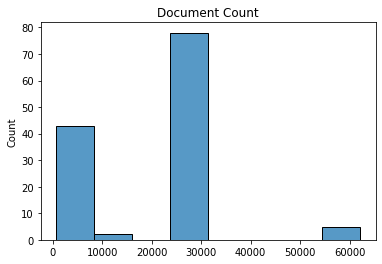

In [51]:
import seaborn as sns

hist = sns.histplot(sizes)
hist.set_title('Document Count')

In [52]:
balanced_dataset = []
SMALLER_SIZE = min(sizes)
for lang, lang_df in df.groupby('LANG'):

  balanced_dataset.append(lang_df.sample(n=SMALLER_SIZE))

In [53]:
balanced_df = pd.concat(balanced_dataset).sample(frac=1)
balanced_df

,LANG,TEXT
1434136,Akawaio,"Sises uya to' usenuminkato' i'tusa' esi'pʉ, mɨ..."
1478866,Nepali,वकील जीनस र अपोल्लसले आफ्ना यात्रा यहाँदेखि जा...
2219310,Ukranian,"Хто ж сумнить ся, чи їсти, осудить ся, бо (їст..."
871353,Zarma,Kala ni ma hanga jeeri sohõ ay sanno se ay ma...
749380,Chamorro,"Na, noseaja derepente ufato, ya infansineda ma..."
...,...,...
1747572,Russian,"Когда же фараон отпустил народ, Бог не повел е..."
73652,Kayapo,"Nhym me kum, —‍Môjdjê ne memã kum, “Gê me prõ'..."
238695,Dinka,"Ku na de raan reec week tɔ ye kamaan, ku reec ..."
463848,Somali,Aabraamna wuxuu jiray lix iyo siddeetan sannad...


In [68]:
balanced_df.to_csv('cls_dataset.csv', index=False, index_label=False)

In [56]:
balanced_df.groupby('LANG').size().min()

677

In [64]:
balanced_df['LANG'].unique()

array(['Akawaio', 'Nepali', 'Ukranian', 'Zarma', 'Chamorro', 'Estonian',
       'Cakchiquel', 'Barasana', 'Slovene', 'Portuguese', 'Russian',
       'Coptic', 'Romanian', 'Aukan', 'Gujarati', 'Manx', 'Paumari',
       'Nambikuara', 'Nadeb', 'Maxakali', 'Nahuatl', 'Armenian', 'Shona',
       'Ojibwa', 'Maori', 'Bakairi', 'Turkish', 'Amuzgo', 'Uma', 'Apalai',
       'Karaja', 'Vietnamese', 'Dutch', 'Tukano', 'Guajajara', 'Danish',
       'Rikbaktsa', 'Guarani', 'Zulu', 'Malayalam', 'English',
       'Potawatomi', 'Kadiweu', 'Creole', 'Wolof', 'Macushi',
       'Urubu-kaapor', 'Syriac', 'Icelandic', 'Apurina', 'Campa',
       'Galela', 'Apinaye', 'Albanian', 'Amharic', 'Kagwahiva', 'Slovak',
       'Italian', 'Aguaruna', 'Myanmar', 'Shuar', 'Latvian', 'Cherokee',
       'Camsa', 'Bulgarian', 'Ewe', 'Tagalog', 'Croatian', 'Wolaytta',
       'Arabic', 'Satere-mawe', 'Czech', 'Xavante', 'Finnish', 'German',
       'Kannada', 'Telugu', 'Lithuanian', 'Kaiwa', 'Cebuano', 'Polish',
       'Korea

In [57]:
DATASET_DIR = 'datasets/'

try:
  os.mkdir(DATASET_DIR)
except OSError:
  pass

In [71]:

for data_size in range(10, 110, 10):
  samples = []
  for lang, lang_df in balanced_df.groupby('LANG'):
      samples.append(lang_df.sample(n=data_size))
  pd.concat(samples).to_csv(os.path.join(DATASET_DIR, 
                                         f'samples_{data_size}.csv'), 
                                        index=False, index_label=False)

In [73]:
!rm -r datasets/.ipynb_checkpoints

In [74]:
datasets_lists = os.listdir('datasets')

['samples_40.csv',
 'samples_20.csv',
 'samples_80.csv',
 'samples_60.csv',
 'samples_100.csv',
 'samples_70.csv',
 'samples_50.csv',
 'samples_90.csv',
 'samples_10.csv',
 'samples_30.csv']

In [79]:
!zip -r datasets.zip datasets/

updating: datasets/ (stored 0%)
  adding: datasets/samples_40.csv (deflated 64%)
  adding: datasets/samples_20.csv (deflated 62%)
  adding: datasets/samples_80.csv (deflated 67%)
  adding: datasets/samples_60.csv (deflated 66%)
  adding: datasets/samples_100.csv (deflated 67%)
  adding: datasets/samples_70.csv (deflated 66%)
  adding: datasets/samples_50.csv (deflated 65%)
  adding: datasets/samples_90.csv (deflated 67%)
  adding: datasets/samples_10.csv (deflated 58%)
  adding: datasets/samples_30.csv (deflated 63%)
